In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression #model 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [2]:
dataset= pd.read_csv('Ecommerce Customers.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
dataset.isnull().sum() # checking null values 

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
dataset= dataset.drop(columns = ['Email','Address']) #its not important in case of prediction 
dataset.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


ValueError: could not convert string to float: 'Violet'

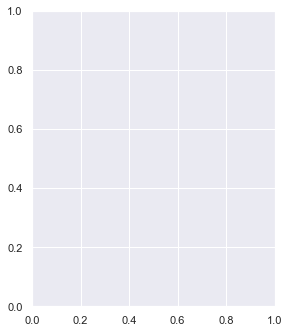

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

In [19]:
dataset= dataset.drop(columns = ['Avatar']) #its not important in case of prediction 
dataset.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


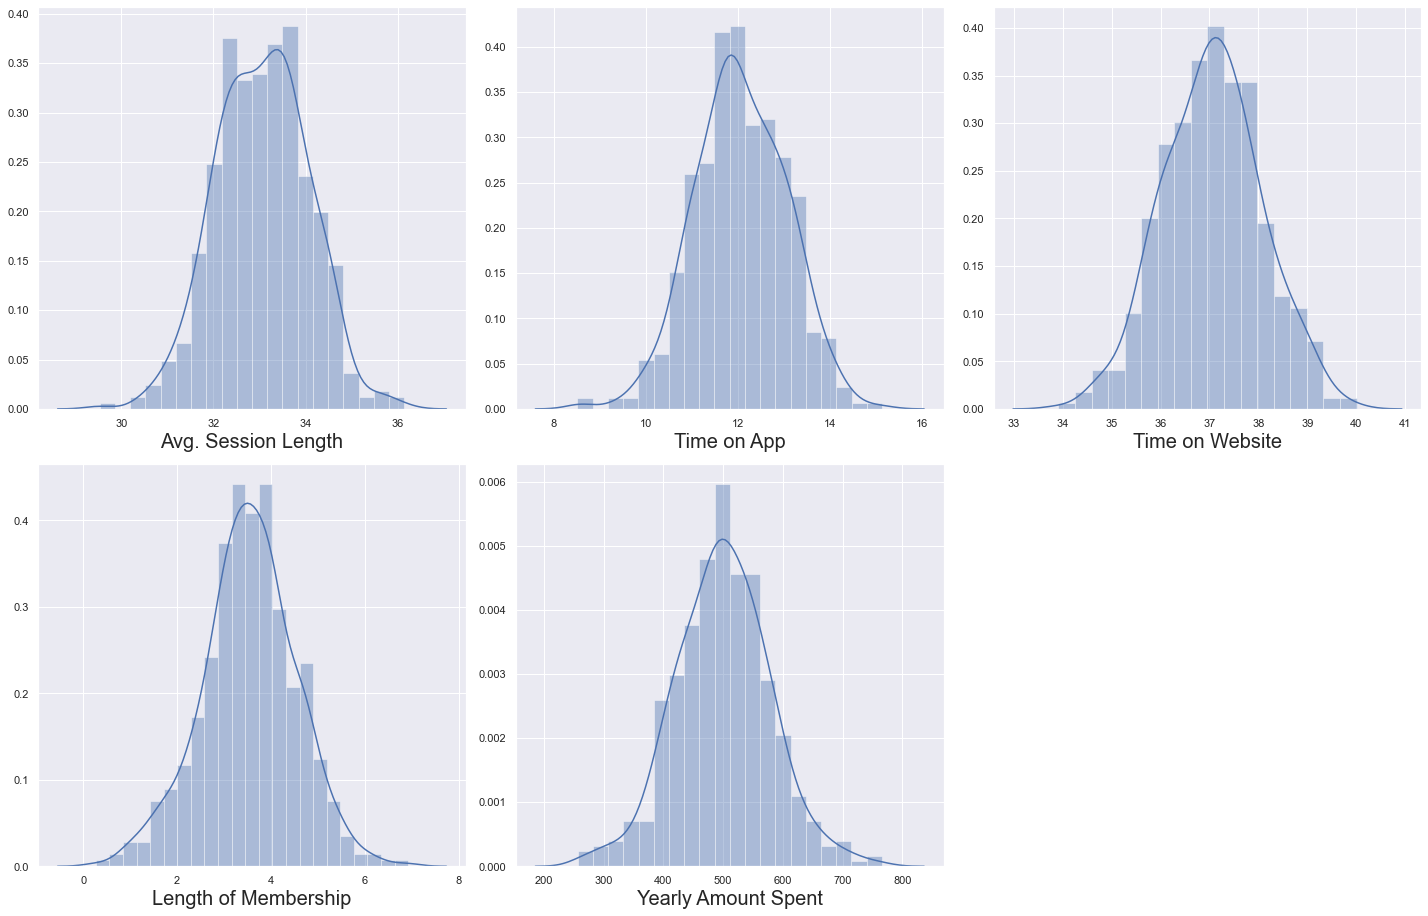

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(dataset[column]) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

In [23]:
y = dataset['Yearly Amount Spent'] #predict / dependent variable 
X =dataset.drop(columns = ['Yearly Amount Spent']) #independent variables 

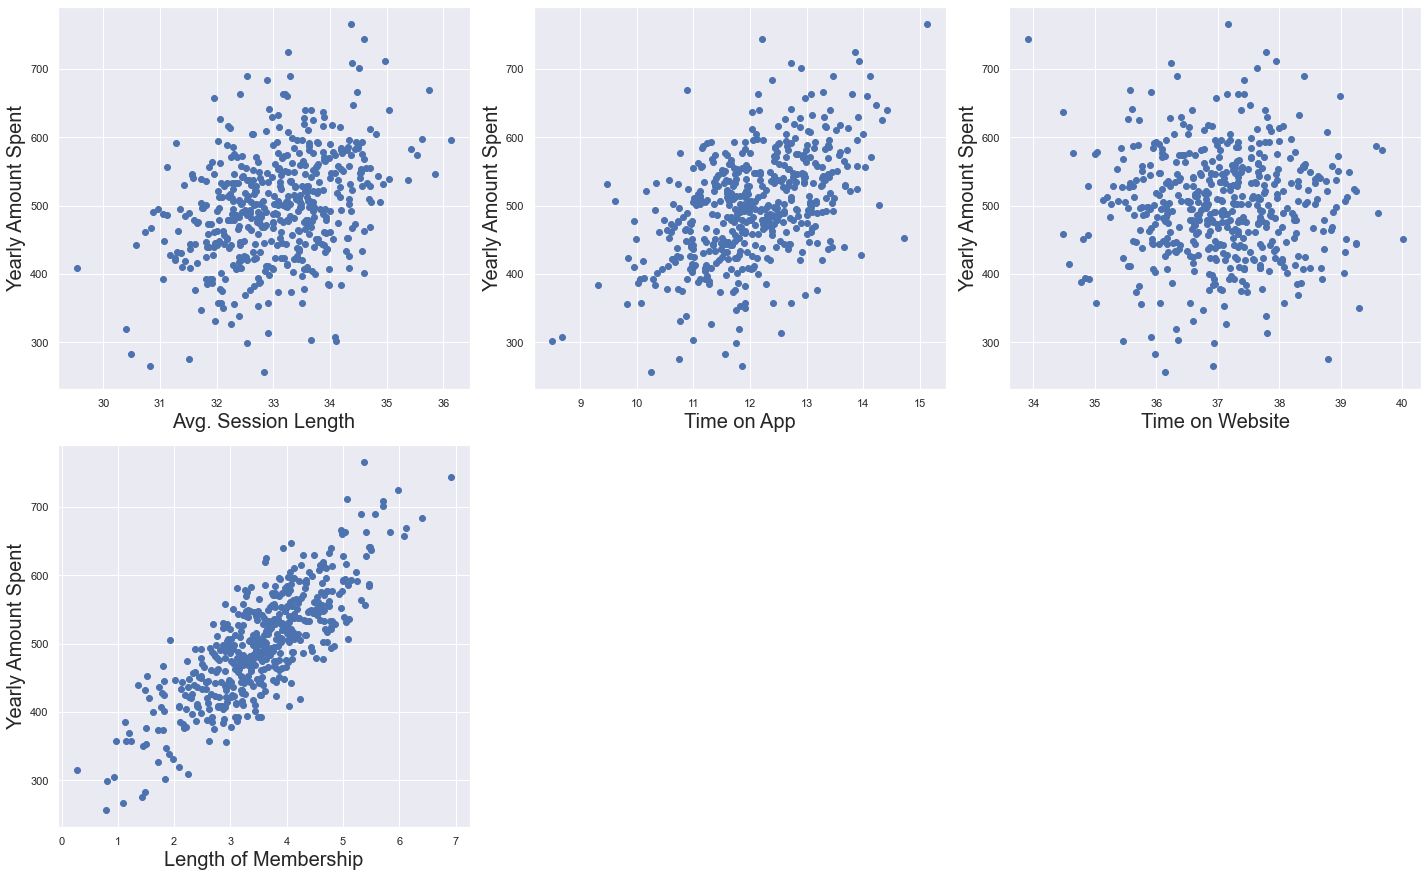

In [24]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=7 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Yearly Amount Spent',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [26]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [27]:
predy=regression.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,predy))
rmse

10.363111516235609

In [28]:
# saving the model to the local file system
filename = 'Ecommerce Cust.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [1]:
linearmodel.score(x,y)

NameError: name 'linearmodel' is not defined